# Load a pretrained model

In [2]:
from keras.models import load_model
import os
path_kaggle=os.path.join('w:\\','Documents','kaggle','cats_vs_dogs')

model = load_model(os.path.join(path_kaggle,'solution','models','cats_and_dogs_small_augmented.h5'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

# Pick a random file

w:\Documents\kaggle\cats_vs_dogs\original\test\12156.jpg (1, 150, 150, 3)


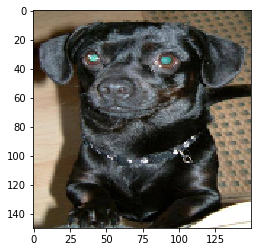

In [358]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.preprocessing import image


def get_random_input(path_files):
    all_files=[]
    for root, subdirs, files_indir in os.walk(path_files):
        subdirfiles=[os.path.join(root,x) for x in files_indir if os.path.isfile(os.path.join(root,x))]
        all_files.extend(subdirfiles)
    
    random_file=random.choice(all_files)
    random_image=image.load_img(random_file, target_size=(150, 150))
    random_image=image.img_to_array(random_image)
    random_image=np.expand_dims(random_image,axis=0)
    random_image /= 255.
    print(random_file,random_image.shape)
    plt.imshow(random_image[0])
    plt.show()
    return random_image
    

image_tensor=get_random_input(path_files=os.path.join(path_kaggle,'original','test'))

In [359]:
from keras import models
layer_outputs=[]
for i,layer in enumerate(model.layers[:8]):
    print(i,layer.output)
    layer_outputs.append(layer.output)

0 Tensor("conv2d_5/Relu:0", shape=(?, 148, 148, 32), dtype=float32)
1 Tensor("max_pooling2d_5/MaxPool:0", shape=(?, 74, 74, 32), dtype=float32)
2 Tensor("conv2d_6/Relu:0", shape=(?, 72, 72, 64), dtype=float32)
3 Tensor("max_pooling2d_6/MaxPool:0", shape=(?, 36, 36, 64), dtype=float32)
4 Tensor("conv2d_7/Relu:0", shape=(?, 34, 34, 128), dtype=float32)
5 Tensor("max_pooling2d_7/MaxPool:0", shape=(?, 17, 17, 128), dtype=float32)
6 Tensor("conv2d_8/Relu:0", shape=(?, 15, 15, 128), dtype=float32)
7 Tensor("max_pooling2d_8/MaxPool:0", shape=(?, 7, 7, 128), dtype=float32)


In [360]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations=activation_model.predict(image_tensor)
for i,activation in enumerate(activations):
    print(i,activation.shape)

0 (1, 148, 148, 32)
1 (1, 74, 74, 32)
2 (1, 72, 72, 64)
3 (1, 36, 36, 64)
4 (1, 34, 34, 128)
5 (1, 17, 17, 128)
6 (1, 15, 15, 128)
7 (1, 7, 7, 128)


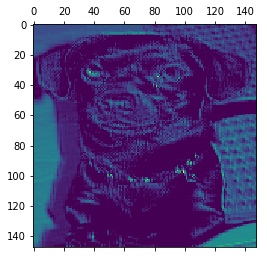

In [361]:
plt.matshow(activations[0][0, :, :, 15], cmap='viridis')

conv2d_5/Relu:0


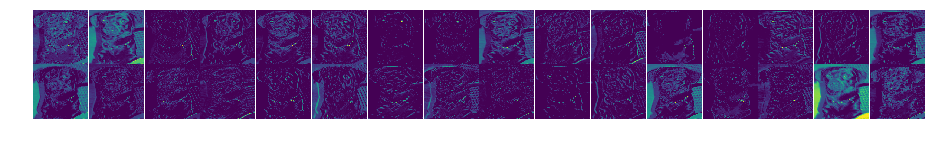

max_pooling2d_5/MaxPool:0


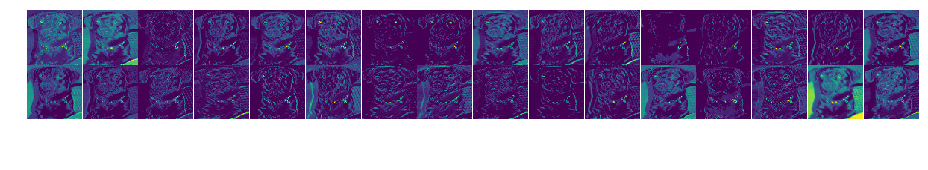

conv2d_6/Relu:0


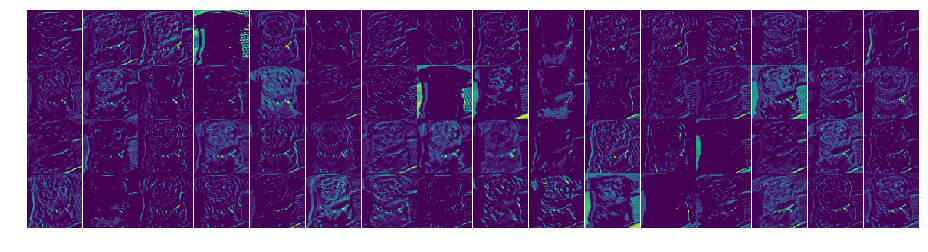

max_pooling2d_6/MaxPool:0


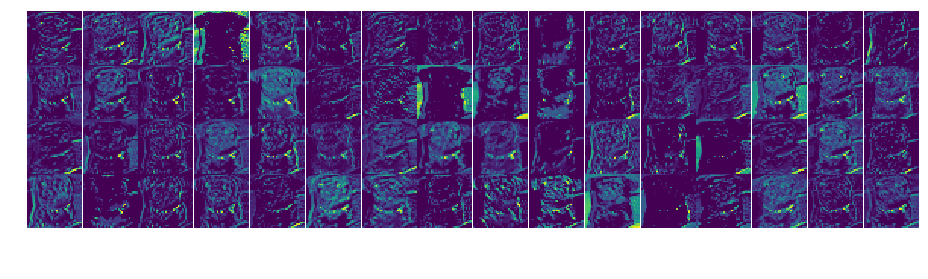

conv2d_7/Relu:0


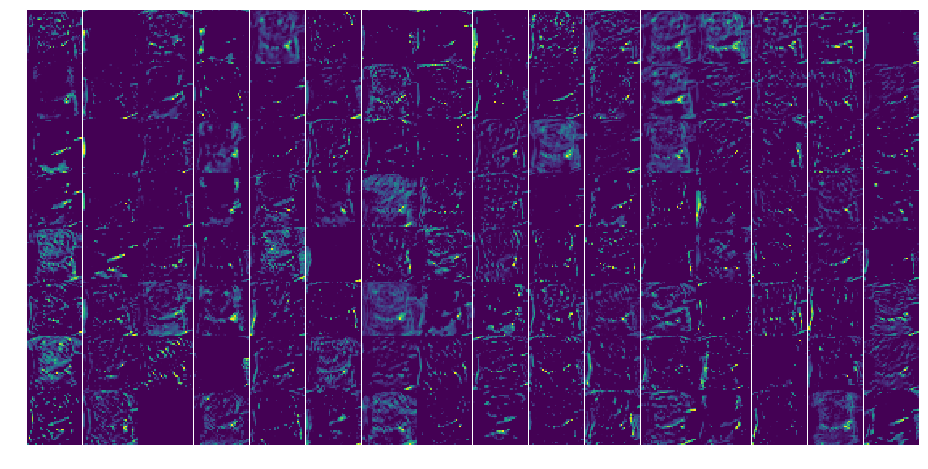

max_pooling2d_7/MaxPool:0


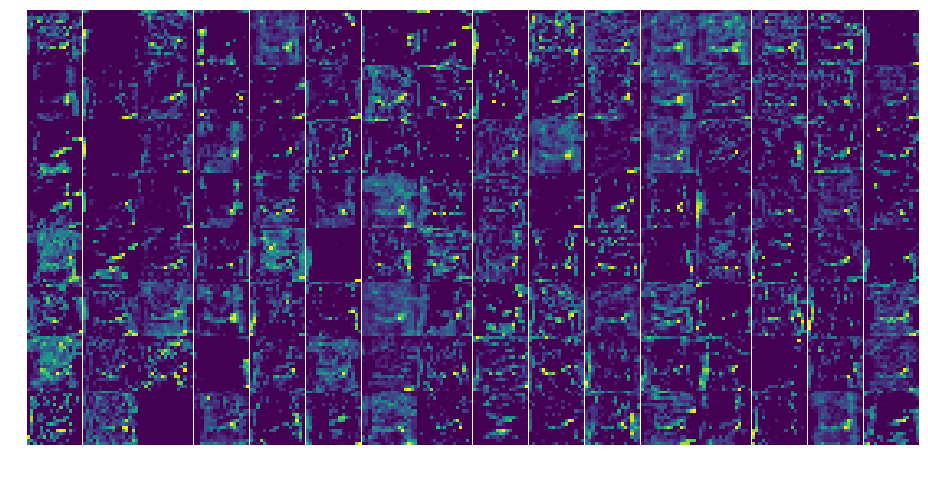

conv2d_8/Relu:0


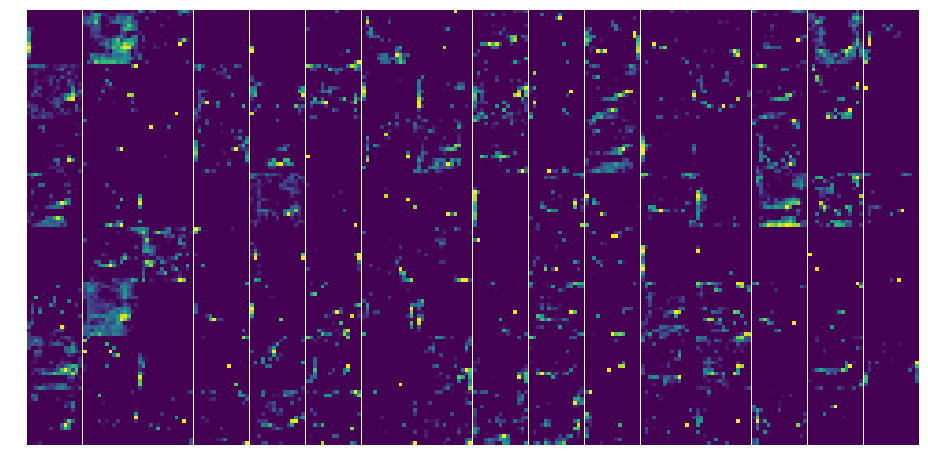

In [ ]:
import math
from matplotlib import gridspec

def plot_layers(activations,layer_outputs,nrow=16):
    for ia,activation in enumerate(activations):
        how_many=activation.shape[-1]
        ncol=math.ceil(how_many/nrow)
        fig = plt.figure(figsize=(nrow,ncol))
        fig.subplots_adjust(hspace=0, wspace=0)

        for i in range(how_many):
            splot=fig.add_subplot(ncol,nrow,i+1, frameon=False)
            splot.axis('off')
            img=activation[0,:,:,i]
            img=plt.imshow(img, cmap='viridis',origin="upper")
        plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
        plt.grid(False)
        plt.ylabel(layer_outputs[ia].name)
        print(layer_outputs[ia].name)
        plt.show()
plot_layers(activations,layer_outputs)